# El modelo de muestreo Thompson

In [15]:
import numpy as np 
np.random.seed(1)

conversionRates=[0.15,0.05,0.13,0.11,0.03]
N=10000
d=len(conversionRates)

X=np.zeros((N,d))
winning=1
losses=-1
nPosReward=np.zeros(d)
nNegReward=np.zeros(d)


for j in range(N):
    for i in range(d):
        if np.random.rand() < conversionRates[i]:
            X[j][i]=winning
        else:
            X[j][i]=losses
X

array([[-1., -1.,  1., -1., -1.],
       [ 1., -1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1.],
       ...,
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1.,  1., -1.]])

In [16]:
for i in range(N):
    selected=0
    maxRandom=0
    for j in range(d):
        randomBeta=np.random.beta(nPosReward[j]+1,nNegReward[j]+1) # funcion de Thompson / Indica si se cambia de maquina segun probabilidad de cada maquina
     
        if randomBeta > maxRandom:
            maxRandom=randomBeta
            selected=j
            
    if X[i][selected]==1:
        nPosReward[selected]+=1
    else:
        nNegReward[selected]+=1
        
nSelected=nPosReward+nNegReward

for i in range(d):
    print('Machine number {} was selected {} times'.format(i+1,nSelected[i]))

print('Conclusion: Best machine is -> ',np.argmax(nSelected)+1)

Machine number 1 was selected 8430.0 times
Machine number 2 was selected 93.0 times
Machine number 3 was selected 458.0 times
Machine number 4 was selected 919.0 times
Machine number 5 was selected 100.0 times
Conclusion: Best machine is ->  1


In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
import random

rango_convesion=[0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01] # probabilidad de cada extrategia
N=10000 # Usuarios 
d=len(rango_convesion)   # Extrategias

X=np.array(np.zeros([N,d])) # Dataset de recompensas

# Enviando extrategias a los usuarios y recogiendo sus valoraciones
for i in range(N):
    for j in range(d):
        if np.random.rand() < rango_convesion[j]:
            X[i][j]=1
        else:
            X[i][j]=0
    
# Con esto se crea el ambiente para la simulacion

In [32]:
# Modelo Selector aleatorio y Thompson Sampling

estrategia_rs=[]
estrategia_ts=[]
total_rewards_rs=0
total_rewards_ts=0
number_rewards_1=[0]*d
number_rewards_0=[0]*d



for n in range(0,N):

    # Selector aleatorio
    
    estr_rs = random.randrange(d)
    estrategia_rs.append(estr_rs)
    reward_rs = X[n,estr_rs]
    total_rewards_rs = total_rewards_rs+reward_rs

# Thompson Sampling

    extra_selected = 0
    randomMax = 0
    reward_ts = 0
    for j in  range(0,d):
        randomBeta=random.betavariate(number_rewards_1[j]+1,number_rewards_0[j]+1)
       
        if randomBeta > randomMax:
            randomMax=randomBeta
            extra_selected=j

    reward_ts = X[n,extra_selected]   
    if reward_ts == 1:
        number_rewards_1[extra_selected] += 1    
    else:
        number_rewards_0[extra_selected] += 1

    estrategia_ts.append(extra_selected)
    total_rewards_ts = total_rewards_ts + reward_ts

relative=((total_rewards_ts-total_rewards_rs)/total_rewards_rs)*100
print('Retorno relativo: {:.0f} %'.format(relative))


Retorno relativo: 94 %


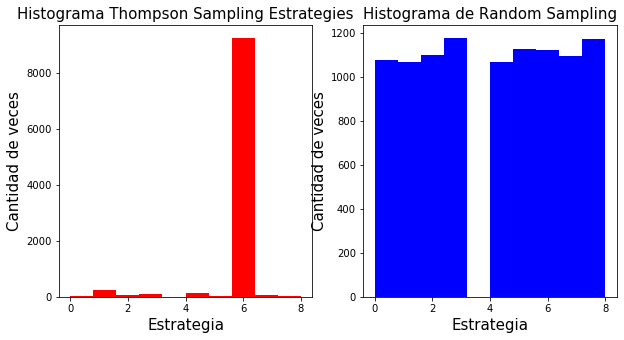

In [54]:
# Histograma de selecciones
figure=plt.figure(figsize=(10,5))
ax=figure.add_subplot(1,2,1)
ax.hist(estrategia_ts,color='r')
plt.title('Histograma Thompson Sampling Estrategies',fontsize=15)
plt.xlabel('Estrategia',fontsize=15)
plt.ylabel('Cantidad de veces',fontsize=15)

ax2=figure.add_subplot(1,2,2)
ax2.hist(estrategia_rs,color='blue')
plt.title('Histograma de Random Sampling',fontsize=15)
plt.xlabel('Estrategia',fontsize=15)
plt.ylabel('Cantidad de veces',fontsize=15)

plt.show()
